In [1]:
import copy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/Shareddrives/IITB_Bosch/Yolov5_DeepSort

/content/drive/Shareddrives/IITB_Bosch/Yolov5_DeepSort


In [4]:
pip install -r ./Yolov5_DeepSort_Pytorch/requirements.txt

     |████████████████████████████████| 596 kB 5.1 MB/s 
     |████████████████████████████████| 5.8 MB 23.5 MB/s 
     |████████████████████████████████| 64 kB 2.4 MB/s 
     |████████████████████████████████| 190 kB 50.5 MB/s 
     |████████████████████████████████| 42 kB 981 kB/s 
     |████████████████████████████████| 69 kB 6.8 MB/s 
     |████████████████████████████████| 42 kB 847 kB/s 
     |████████████████████████████████| 64 kB 1.9 MB/s 
     |████████████████████████████████| 73 kB 1.8 MB/s 
     |████████████████████████████████| 41 kB 569 kB/s 
     |████████████████████████████████| 68 kB 6.5 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
%cd Yolov5_DeepSort_Pytorch/

/content/drive/Shareddrives/IITB_Bosch/Yolov5_DeepSort/Yolov5_DeepSort_Pytorch


In [6]:
!pip install pafy
!pip install youtube_dl==2020.12.2

     |████████████████████████████████| 1.8 MB 5.6 MB/s 


In [7]:
!python3 track.py --source '/content/drive/Shareddrives/IITB_Bosch/Yolov5_DeepSort/trimmed_video.mp4' --classes 0 --save-vid --save-txt --save-dir "/content/drive/Shareddrives/IITB_Bosch/Yolov5_DeepSort/results"

deep_sort/deep/reid/torchreid/metrics/rank.py:12: UserWarning: Cython evaluation (very fast so highly recommended) is unavailable, now use python evaluation.
  'Cython evaluation (very fast so highly recommended) is '

Available ReID models for automatic download
['resnet50_market1501', 'resnet50_dukemtmcreid', 'resnet50_msmt17', 'resnet50_fc512_market1501', 'resnet50_fc512_dukemtmcreid', 'resnet50_fc512_msmt17', 'mlfn_market1501', 'mlfn_dukemtmcreid', 'mlfn_msmt17', 'hacnn_market1501', 'hacnn_dukemtmcreid', 'hacnn_msmt17', 'mobilenetv2_x1_0_market1501', 'mobilenetv2_x1_0_dukemtmcreid', 'mobilenetv2_x1_0_msmt17', 'mobilenetv2_x1_4_market1501', 'mobilenetv2_x1_4_dukemtmcreid', 'mobilenetv2_x1_4_msmt17', 'osnet_x1_0_market1501', 'osnet_x1_0_dukemtmcreid', 'osnet_x1_0_msmt17', 'osnet_x0_75_market1501', 'osnet_x0_75_dukemtmcreid', 'osnet_x0_75_msmt17', 'osnet_x0_5_market1501', 'osnet_x0_5_dukemtmcreid', 'osnet_x0_5_msmt17', 'osnet_x0_25_market1501', 'osnet_x0_25_dukemtmcreid', 'osnet_x0_25

In [11]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

global_frame_arr = []

df = pd.read_csv("/content/drive/Shareddrives/IITB_Bosch/Yolov5_DeepSort/results/trimmed_video.txt", delimiter=' ', header=None)
df = df[[0, 1, 2, 3, 4, 5]]

video = cv2.VideoCapture('/content/drive/Shareddrives/IITB_Bosch/Yolov5_DeepSort/trimmed_video.mp4')

frame_number = 0
while(video.isOpened()):
    ret, frame = video.read()
    if ret == False:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    global_frame_arr.append(frame)
    frame_number += 1
frame_number

76

In [12]:
detection_list = df.to_numpy()
len(detection_list)

5654

In [13]:
detection_list

array([[  3,   1, 319,  11, 261, 345],
       [  3,   2,  12,  83, 133, 270],
       [  3,   3, 560,  77,  78, 270],
       ...,
       [ 76,  24,   0, 100,  80, 258],
       [ 76,  34, 230, 172,  56, 140],
       [ 76,  35, 611, 175,  28, 184]])

In [14]:
class People_wrt_frame:
    def __init__(self):
        self.frame_number = 0
        self.id = -1
        self.person_x_min = -1
        self.person_y_min = -1
        self.person_w = -1
        self.person_h = -1
        self.frame_person = None
        self.face_x_min = -1
        self.face_y_min = -1
        self.face_w = -1
        self.face_h = -1
        self.frame_face = None
        self.is_person = False
        self.is_face = False
        self.is_SR = False

global_people_info = []

for i in range(len(detection_list)):
    temp_instance = People_wrt_frame()
    global_people_info.append(temp_instance)

In [15]:
frames_after_deep_sort = []
for i in range(len(detection_list)):
    frame = global_frame_arr[detection_list[i][0] - 1]

    frame_cut = frame[detection_list[i][3]: detection_list[i][3] + detection_list[i][5], detection_list[i][2]: detection_list[i][2] + detection_list[i][4]]
    # frame_cut = cv2.cvtColor(frame_cut, cv2.COLOR_BGR2RGB)
    frames_after_deep_sort.append(frame_cut)

    global_people_info[i].frame_number = detection_list[i][0]
    global_people_info[i].id = detection_list[i][1]
    global_people_info[i].person_x_min = detection_list[i][3]
    global_people_info[i].person_y_min = detection_list[i][2]
    global_people_info[i].person_w = detection_list[i][5]
    global_people_info[i].person_h = detection_list[i][4]
    global_people_info[i].frame_person = copy.deepcopy(frame_cut)
    global_people_info[i].is_person = True


<h1>SECTION BREAK</h1>
<h1>DEEP SORT UP</h1>
<h1>RETINA DOWN</h1>


In [17]:
%cd /content/drive/Shareddrives/IITB_Bosch/Retina_Face

/content/drive/Shareddrives/IITB_Bosch/Retina_Face


In [18]:
from __future__ import print_function
import os
import cv2
import argparse
import torch
import torch.backends.cudnn as cudnn
import numpy as np
from data import cfg_mnet, cfg_re50
from layers.functions.prior_box import PriorBox
from utils.nms.py_cpu_nms import py_cpu_nms
from models.retinaface import RetinaFace
from utils.box_utils import decode, decode_landm
from utils.timer import Timer

In [19]:
def check_keys(model, pretrained_state_dict):
    ckpt_keys = set(pretrained_state_dict.keys())
    model_keys = set(model.state_dict().keys())
    used_pretrained_keys = model_keys & ckpt_keys
    unused_pretrained_keys = ckpt_keys - model_keys
    missing_keys = model_keys - ckpt_keys
    print('Missing keys:{}'.format(len(missing_keys)))
    print('Unused checkpoint keys:{}'.format(len(unused_pretrained_keys)))
    print('Used keys:{}'.format(len(used_pretrained_keys)))
    assert len(used_pretrained_keys) > 0, 'load NONE from pretrained checkpoint'
    return True

In [20]:
def remove_prefix(state_dict, prefix):
    ''' Old style model is stored with all names of parameters sharing common prefix 'module.' '''
    print('remove prefix \'{}\''.format(prefix))
    f = lambda x: x.split(prefix, 1)[-1] if x.startswith(prefix) else x
    return {f(key): value for key, value in state_dict.items()}

In [21]:
def load_model(model, pretrained_path, load_to_cpu):
    print('Loading pretrained model from {}'.format(pretrained_path))
    if load_to_cpu:
        pretrained_dict = torch.load(pretrained_path, map_location=lambda storage, loc: storage)
    else:
        device = torch.cuda.current_device()
        pretrained_dict = torch.load(pretrained_path, map_location=lambda storage, loc: storage.cuda(device))
    if "state_dict" in pretrained_dict.keys():
        pretrained_dict = remove_prefix(pretrained_dict['state_dict'], 'module.')
    else:
        pretrained_dict = remove_prefix(pretrained_dict, 'module.')
    check_keys(model, pretrained_dict)
    model.load_state_dict(pretrained_dict, strict=False)
    return model

In [22]:
class Arguments():
    pass
args = Arguments()
args.trained_model = "/content/drive/Shareddrives/IITB_Bosch/Retina_Face/weights/Resnet50_Final.pth"
args.network = "resnet50"
args.cpu = False
args.dataset = "FDDB"
args.confidence_threshold = 0.02
args.top_k = 5
args.nms_threshold = 0.4
args.keep_top_k = 1
args.save_image = True
args.save_folder = '/content/drive/Shareddrives/IITB_Bosch/Retina_Face/results'
args.vis_thres = 0.5

In [23]:

torch.set_grad_enabled(False)
cfg = None
if args.network == "mobile0.25":
    cfg = cfg_mnet
elif args.network == "resnet50":
    cfg = cfg_re50
# net and model
net = RetinaFace(cfg=cfg, phase = 'test')
net = load_model(net, args.trained_model, args.cpu)
net.eval()
print('Finished loading model!')
print(net)
cudnn.benchmark = True
device = torch.device("cpu" if args.cpu else "cuda")
net = net.to(device)

# save file
if not os.path.exists(args.save_folder):
    os.makedirs(args.save_folder)
fw = open(os.path.join(args.save_folder, args.dataset + '_dets.txt'), 'w')

# testing dataset
testset_folder = os.path.join('data', args.dataset, 'images/')
testset_list = os.path.join('data', args.dataset, 'img_list.txt')
with open(testset_list, 'r') as fr:
    test_dataset = fr.read().split()
num_images = len(global_people_info)

# testing scale
resize = 1

_t = {'forward_pass': Timer(), 'misc': Timer()}

# testing begin
frames_after_retina = []

for i in range(num_images):
    img_raw = copy.deepcopy(global_people_info[i].frame_person)
    [height, width, channels] = img_raw.shape
    img = np.float32(img_raw)

    if resize != 1:
        img = cv2.resize(img, None, None, fx=resize, fy=resize, interpolation=cv2.INTER_LINEAR)
    im_height, im_width, _ = img.shape
    scale = torch.Tensor([img.shape[1], img.shape[0], img.shape[1], img.shape[0]])
    img -= (104, 117, 123)
    img = img.transpose(2, 0, 1)
    img = torch.from_numpy(img).unsqueeze(0)
    img = img.to(device)
    scale = scale.to(device)

    _t['forward_pass'].tic()
    loc, conf, landms = net(img)  # forward pass
    _t['forward_pass'].toc()
    _t['misc'].tic()
    priorbox = PriorBox(cfg, image_size=(im_height, im_width))
    priors = priorbox.forward()
    priors = priors.to(device)
    prior_data = priors.data
    boxes = decode(loc.data.squeeze(0), prior_data, cfg['variance'])
    boxes = boxes * scale / resize
    boxes = boxes.cpu().numpy()
    scores = conf.squeeze(0).data.cpu().numpy()[:, 1]
    landms = decode_landm(landms.data.squeeze(0), prior_data, cfg['variance'])
    scale1 = torch.Tensor([img.shape[3], img.shape[2], img.shape[3], img.shape[2],
                            img.shape[3], img.shape[2], img.shape[3], img.shape[2],
                            img.shape[3], img.shape[2]])
    scale1 = scale1.to(device)
    landms = landms * scale1 / resize
    landms = landms.cpu().numpy()

    # ignore low scores
    inds = np.where(scores > args.confidence_threshold)[0]
    boxes = boxes[inds]
    landms = landms[inds]
    scores = scores[inds]

    # keep top-K before NMS
    order = scores.argsort()[::-1][:args.top_k]
    order = scores.argsort()[::-1]
    boxes = boxes[order]
    landms = landms[order]
    scores = scores[order]

    # do NMS
    dets = np.hstack((boxes, scores[:, np.newaxis])).astype(np.float32, copy=False)
    keep = py_cpu_nms(dets, args.nms_threshold)

    dets = dets[keep, :]
    landms = landms[keep]

    # keep top-K faster NMS
    dets = dets[:args.keep_top_k, :]
    landms = landms[:args.keep_top_k, :]

    dets = np.concatenate((dets, landms), axis=1)
    _t['misc'].toc()

    # save dets
    fw.write('{:s}\n'.format("face_idx" + str(i)))
    fw.write('{:.1f}\n'.format(dets.shape[0]))
    # for k in range(dets.shape[0]):
    if len(dets) > 0:
        ymin = dets[0, 0]
        xmin = dets[0, 1]
        ymax = dets[0, 2]
        xmax = dets[0, 3]
        score = dets[0, 4]
        w = xmax - xmin + 1
        h = ymax - ymin + 1
        dets[0, 0] = max(dets[0, 0] - (30*h/100), 0)
        dets[0, 1] = max(dets[0, 1] - (30*w/100), 0)
        dets[0, 2] = min(dets[0, 2] + (30*h/100), height)
        dets[0, 3] = min(dets[0, 3] + (30*w/100), width)
        ymin = dets[0, 0]
        xmin = dets[0, 1]
        ymax = dets[0, 2]
        xmax = dets[0, 3]
        w = xmax - xmin + 1
        h = ymax - ymin + 1

        global_people_info[i].face_x_min = int(xmin)
        global_people_info[i].face_y_min = int(ymin)
        global_people_info[i].face_w = int(w)
        global_people_info[i].face_h = int(h)
        global_people_info[i].is_person = True

        frame_cut = global_people_info[i].frame_person[int(xmin): int(xmax), int(ymin): int(ymax)]
        global_people_info[i].frame_face = copy.deepcopy(frame_cut)
        
    #     # fw.write('{:.3f} {:.3f} {:.3f} {:.3f} {:.10f}\n'.format(xmin, ymin, w, h, score))
        fw.write('{:d} {:d} {:d} {:d} {:.10f}\n'.format(int(xmin), int(ymin), int(w), int(h), score))
        break

    print('im_detect: {:d}/{:d} forward_pass_time: {:.4f}s misc: {:.4f}s'.format(i + 1, num_images, _t['forward_pass'].average_time, _t['misc'].average_time))

    # # show image
    # if args.save_image:
    #     for b in dets:
    #         print(b)
    #         if b[4] < args.vis_thres:
    #             continue
    #         text = "{:.4f}".format(b[4])
    #         b = list(map(int, b))
    #         cv2.rectangle(img_raw, (b[0], b[1]), (b[2], b[3]), (255, 255, 0), 2)
    #         cx = b[0]
    #         cy = b[1] + 12
    #         cv2.putText(img_raw, text, (cx, cy),
    #                     cv2.FONT_HERSHEY_DUPLEX, 0.5, (255, 255, 255))
            
    #     # save image
    #     if not os.path.exists("./results/"):
    #         os.makedirs("./results/")
    #     name = "./results/" + str(i) + ".jpg"
    #     if (len(dets) > 0):
    #         cv2.imwrite(name, frames_after_deep_sort[i][int(dets[0, 1]): int(dets[0, 3]), int(dets[0, 0]): int(dets[0, 2])])
    


fw.close()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Loading pretrained model from /content/drive/Shareddrives/IITB_Bosch/Retina_Face/weights/Resnet50_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:456
Finished loading model!
RetinaFace(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 

0
68
135
106


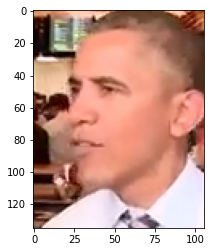

In [24]:
plt.imshow(global_people_info[0].frame_person[global_people_info[0].face_x_min: global_people_info[0].face_x_min + global_people_info[0].face_w, global_people_info[0].face_y_min: global_people_info[0].face_y_min + global_people_info[0].face_h])
print(global_people_info[0].face_x_min)
print(global_people_info[0].face_y_min)
print(global_people_info[0].face_w)
print(global_people_info[0].face_h)

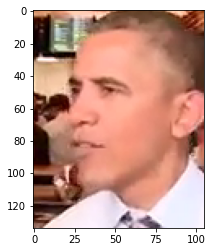

In [25]:
plt.imshow(global_people_info[0].frame_face)

<h1>SECTION BREAK</h1>
<h1>RETINA UP</h1>
<h1>GFPGAN DOWN</h1>